In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import matplotlib.pylab as plt

In [2]:
class Net(nn.Module):

    # Constructor
    def __init__(self, D_in, H, D_out):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)

    # Prediction
    def forward(self, x):
        x = torch.sigmoid(self.linear1(x))
        x = self.linear2(x)
        return x

In [3]:
def plot_accuracy_loss(training_results):
    plt.subplot(2, 1, 1)
    plt.plot(training_results['training_loss'], 'r')
    plt.ylabel('loss')
    plt.title('training loss iterations')
    plt.subplot(2, 1, 2)
    plt.plot(training_results['validation_accuracy'])
    plt.ylabel('accuracy')
    plt.xlabel('epochs')
    plt.show()

In [4]:
def print_model_parameters(model):
    count = 0
    for ele in model.state_dict():
        count += 1
        if count % 2 != 0:
            print ("The following are the parameters for the layer ", count // 2 + 1)
        if ele.find("bias") != -1:
            print("The size of bias: ", model.state_dict()[ele].size())
        else:
            print("The size of weights: ", model.state_dict()[ele].size())

In [5]:
def show_data(data_sample):
    plt.imshow(data_sample.numpy().reshape(28, 28), cmap='gray')
    plt.show()

In [6]:
def train(model, criterion, train_loader, validation_loader, optimizer, epochs=100):
    useful_stuff = {'training_loss': [],'validation_accuracy': []}
    for epoch in range(epochs):
        for _, (x, y) in enumerate(train_loader):
            optimizer.zero_grad()
            z = model(x.view(-1, 28 * 28))
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
             #loss for every iteration
            useful_stuff['training_loss'].append(loss.data.item())
        correct = 0
        for x, y in validation_loader:
            #validation
            z = model(x.view(-1, 28 * 28))
            _, label = torch.max(z, 1)
            correct += (label == y).sum().item()
        accuracy = 100 * (correct / len(validation_loader))
        useful_stuff['validation_accuracy'].append(accuracy)
    return useful_stuff

In [7]:
train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
validation_dataset = dsets.MNIST(root='./data', download=True, transform=transforms.ToTensor())

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 48485190.25it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1685342.73it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 13483109.58it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3326441.20it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [8]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=2000, shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000, shuffle=False)

In [9]:
input_dim = 28 * 28
hidden_dim = 100
output_dim = 10

model = Net(input_dim, hidden_dim, output_dim)
parameters = model.parameters()

In [12]:
print_model_parameters(model)

The following are the parameters for the layer  1
The size of weights:  torch.Size([100, 784])
The size of bias:  torch.Size([100])
The following are the parameters for the layer  2
The size of weights:  torch.Size([10, 100])
The size of bias:  torch.Size([10])


In [13]:
learning_rate = 0.01
optimizer = torch.optim.SGD(parameters, lr=learning_rate)
criterion = nn.CrossEntropyLoss()

In [14]:
training_results = train(model, criterion, train_loader, validation_loader, optimizer, epochs=30)

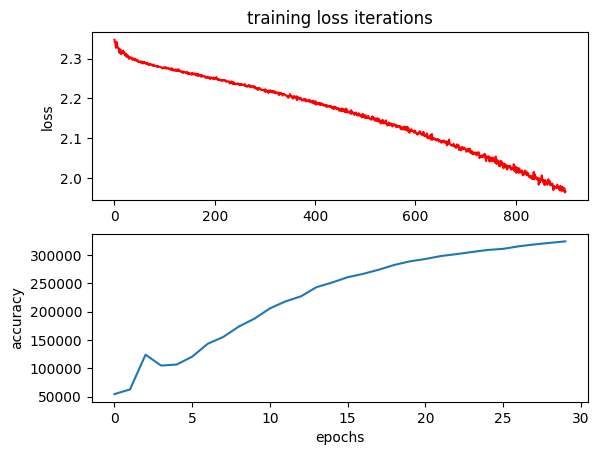

In [15]:
plot_accuracy_loss(training_results)

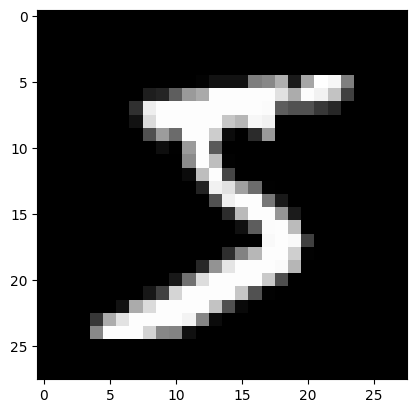

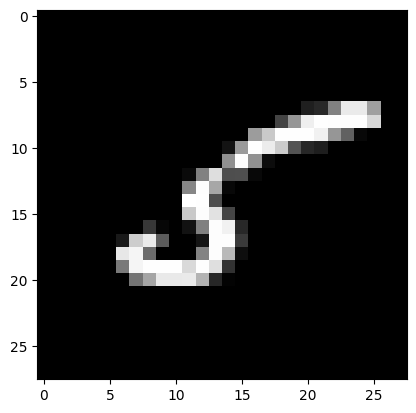

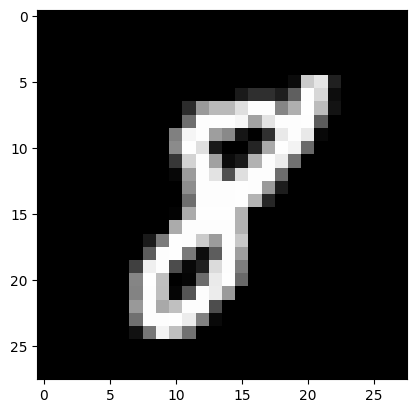

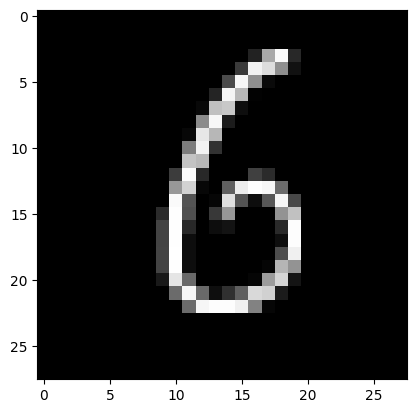

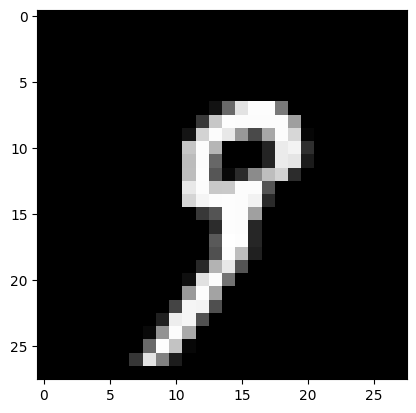

In [16]:
# Plot the first five misclassified samples

count = 0
for x, y in validation_dataset:
    z = model(x.reshape(-1, 28 * 28))
    _,yhat = torch.max(z, 1)
    if yhat != y:
        show_data(x)
        count += 1
    if count >= 5:
        break